# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

The data is already with us hence there won't be any call made for the same . We will be reading the necessary dataset 
from the local drive 


## Data and Setup

In [1]:
##Import all necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

** Read in the csv file as a dataframe called df **

In [2]:
df = pd.read_csv("911.csv")

** Check the info() of the df **

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Focus now on data cleaning especially the NAN values . 

In [5]:
#Below mentioned check is to confirm if the dataset column has any null vaules . 
df.isnull().any()

lat          False
lng          False
desc         False
zip           True
title        False
timeStamp    False
twp           True
addr          True
e            False
dtype: bool

In [6]:
df[df.isnull().any(axis=1)].head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,MONTGOMERY,RT202 PKWY & KNAPP RD,1
14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1
23,40.143326,-75.422819,RT422 & PAWLINGS RD OVERPASS; LOWER PROVIDENC...,NaN,Traffic: DISABLED VEHICLE -,2015-12-10 18:02:02,LOWER PROVIDENCE,RT422 & PAWLINGS RD OVERPASS,1
24,40.153268,-75.189558,SUMMIT AVE & RT309 UNDERPASS; UPPER DUBLIN; 20...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 18:02:02,UPPER DUBLIN,SUMMIT AVE & RT309 UNDERPASS,1


In [7]:
#As we could see zip,twp and addr has Nan values in it .The common notion is that zip township and address 
#can't be replicated since this are user based entry and it is imperative that we inform the center on this anomaly .
#For now we drop the same from our dataset and proceed further . 
#df.dropna(inplace=True)

In [8]:
df.isnull().any() # no more null values to address . The same dataset can be used further for the analysis. 

lat          False
lng          False
desc         False
zip          False
title        False
timeStamp    False
twp          False
addr         False
e            False
dtype: bool

In [9]:
# this command is to reset the index since dropping the Nan values ,would distort the 
#dataset index 
df.reset_index(drop=True,inplace=True) 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86576 entries, 0 to 86575
Data columns (total 9 columns):
lat          86576 non-null float64
lng          86576 non-null float64
desc         86576 non-null object
zip          86576 non-null float64
title        86576 non-null object
timeStamp    86576 non-null object
twp          86576 non-null object
addr         86576 non-null object
e            86576 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 5.9+ MB


** What are the top 5 zipcodes for 911 calls? **

In [11]:
df['zip'].value_counts().head()

19401.0    6977
19464.0    6641
19403.0    4854
19446.0    4745
19406.0    3173
Name: zip, dtype: int64

**at the 'title' column, how many unique title codes are there? **

In [193]:
len(df['title'].unique())

107

## Creating new features

** Titles column has  "Reasons/Departments" specified before the title code. 
**These are EMS, Fire, and Traffic. we will create a new column that contains this string value.** 
** Idea is to understand the patten behind the reason and their share in call volume  .

In [43]:
titles = df['title']
reason = titles.apply(lambda x :x.split())
reason = [i[0] for i in reason]
df['reason'] = reason 

In [47]:
df.info(),df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86576 entries, 0 to 86575
Data columns (total 10 columns):
lat          86576 non-null float64
lng          86576 non-null float64
desc         86576 non-null object
zip          86576 non-null float64
title        86576 non-null object
timeStamp    86576 non-null object
twp          86576 non-null object
addr         86576 non-null object
e            86576 non-null int64
reason       86576 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 6.6+ MB


(None,
          lat        lng                                               desc  \
 0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
 1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
 2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
 3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
 4  40.253473 -75.283245  CANNON AVE & W 9TH ST;  LANSDALE; Station 345;...   
 
        zip                    title            timeStamp                twp  \
 0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
 1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
 2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
 3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
 4  19446.0         EMS: HEAD INJURY  2015-12-10 17:40:01           LANSDALE   
 
                          addr  e r

** Try to find the most common Reason for a 911 call based off of this new column? **

In [48]:
df['reason'].value_counts()

EMS:        44318
Traffic:    29254
Fire:       13004
Name: reason, dtype: int64

**Generate a hist plot for the reason tag : **

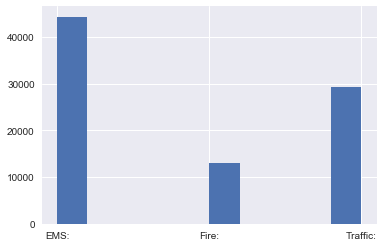

In [55]:
plt.hist(df['reason'])
plt.show()
#b

**create a countplot of 911 calls by Reason. **

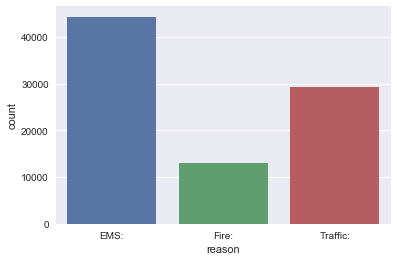

In [101]:
sns.countplot(df['reason'])

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [74]:
df['timeStamp']=pd.to_datetime(df['timeStamp']) 

**To create 3 new columns called Hour, Month, and Day of Week. .** This is to understand the call volume 
divided in hours month and days to understand the volume properly.**

In [130]:
time = df['timeStamp']
time.head()
time.iloc[0].date()

datetime.date(2015, 12, 10)

In [131]:

df['hour'] = time.apply(lambda x:x.hour)
df['month'] = time.apply(lambda x:x.month)
df['day'] = time.apply(lambda x:x.weekday_name)
df['date'] = time.apply(lambda x:x.date())


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

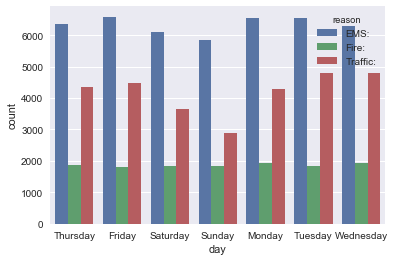

In [135]:
sns.countplot(df['day'],hue=df['reason'])

**Now do the same for Month:**

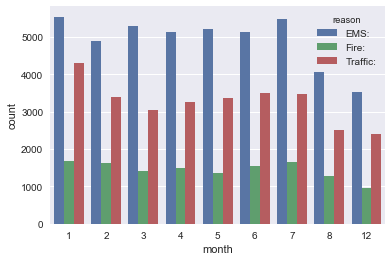

In [136]:
sns.countplot(df['month'],hue=df['reason'])

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation.**

df2 = df.groupby(by= 'month').sum()
df2.reset_index('month',inplace = True)
df2

**  plot to indicate the count of calls per month. **

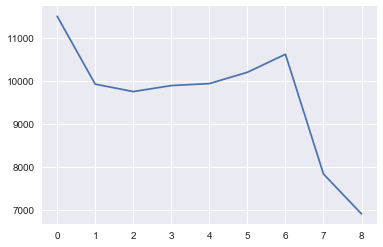

In [138]:
plt.plot(df2['e'])

**lmplot() to create a linear fit on the number of calls per month. **

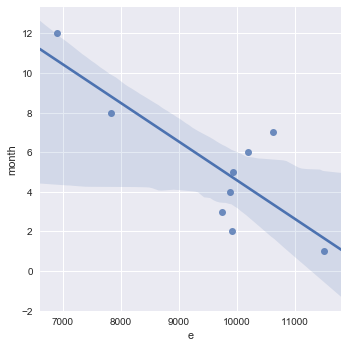

In [139]:
sns.lmplot(x ='e',y ='month',data=df2)

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

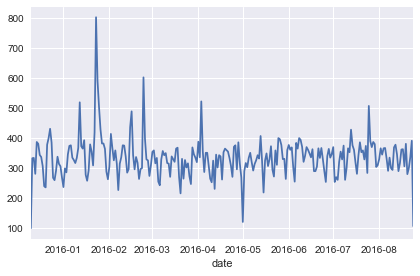

In [163]:
df.groupby('date').count()['twp'].plot()
plt.tight_layout()

** Now we create plots representing a Reason for the 911 call**

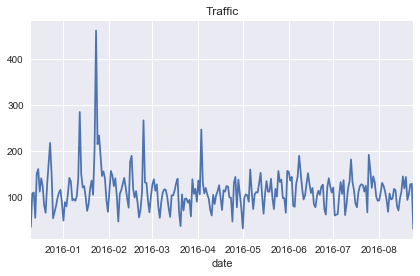

In [169]:
df[df['reason']=='Traffic:'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

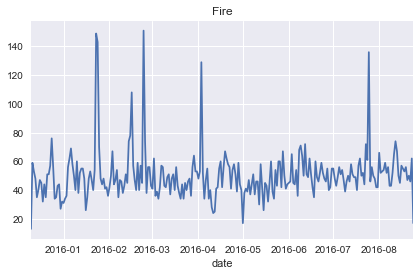

In [172]:
df[df['reason']=='Fire:'].groupby('date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

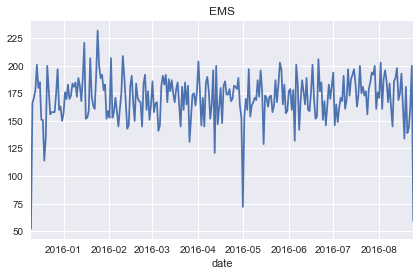

In [173]:
df[df['reason']=='EMS:'].groupby('date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

** Now let's move on to creating  heatmaps with seaborn and our data. **

In [182]:
dayHour = df.groupby(by=['day','hour']).count()
dayHour.head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  reason  \
day    hour                                                                  
Friday 0     248  248   248  248    248        248  248   248  248     248   
       1     200  200   200  200    200        200  200   200  200     200   
       2     165  165   165  165    165        165  165   165  165     165   
       3     164  164   164  164    164        164  164   164  164     164   
       4     184  184   184  184    184        184  184   184  184     184   

             month  date  
day    hour               
Friday 0       248   248  
       1       200   200  
       2       165   165  
       3       164   164  
       4       184   184

In [179]:
dayHour = df.groupby(by=['day','hour']).count()['reason'].unstack()
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Friday,248,200,165,164,184,166,319,525,636,663,...,806,839,897,825,714,616,569,491,445,400
Monday,243,198,183,173,185,222,338,547,723,689,...,759,776,837,845,762,654,547,443,410,294
Saturday,324,265,226,212,202,205,227,352,416,566,...,674,677,705,649,678,613,549,508,450,402
Sunday,335,280,245,228,199,214,251,342,434,554,...,608,588,555,608,574,559,464,419,365,283
Thursday,251,180,200,144,162,167,293,495,685,733,...,758,827,790,867,706,610,543,472,356,307
Tuesday,241,214,161,148,184,203,350,563,719,763,...,821,823,867,896,759,665,578,494,411,245
Wednesday,225,193,169,193,138,224,332,591,769,714,...,787,760,860,878,771,590,596,507,432,294


** Now create a HeatMap using this new DataFrame. **

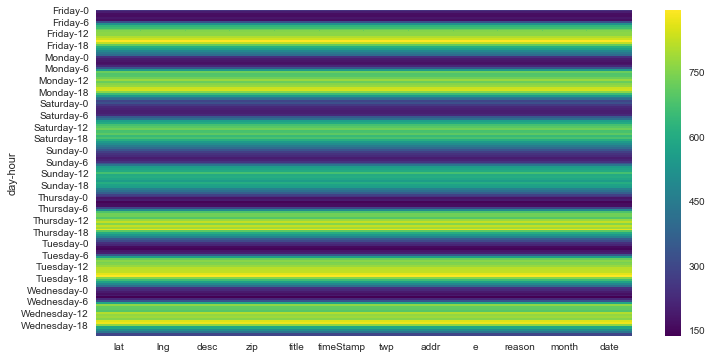

In [183]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

** Now create a clustermap using this DataFrame. **

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


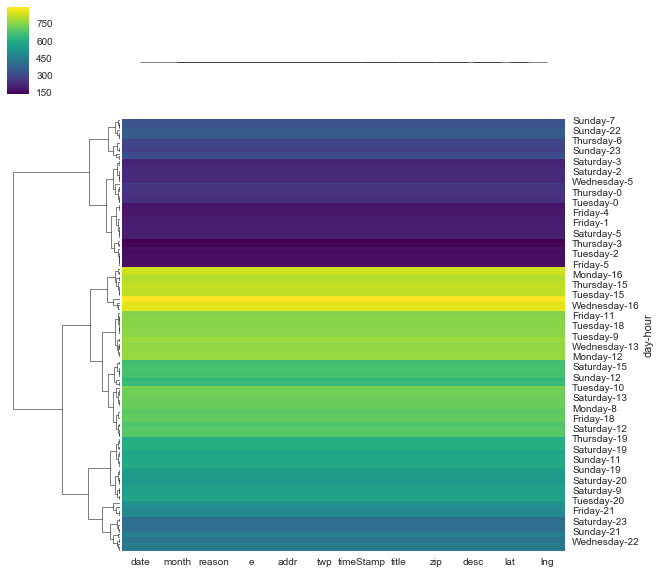

In [184]:
sns.clustermap(dayHour,cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [188]:
daymonth = df.groupby(by=['day','month']).count()['reason'].unstack()
daymonth

month,1,2,3,4,5,6,7,8,12
day,,,,,,,,,
Friday,1735,1360,1331,1683,1504,1429,1810,1123,905
Monday,1505,1658,1364,1401,1547,1395,1472,1315,1100
Saturday,1979,1240,1110,1512,1264,1201,1507,955,831
Sunday,1726,1058,973,1304,1230,1136,1440,878,805
Thursday,1387,1391,1648,1390,1387,1800,1447,1038,1087
Tuesday,1697,1535,1647,1255,1658,1452,1446,1415,1092
Wednesday,1482,1684,1680,1348,1349,1790,1502,1105,1078


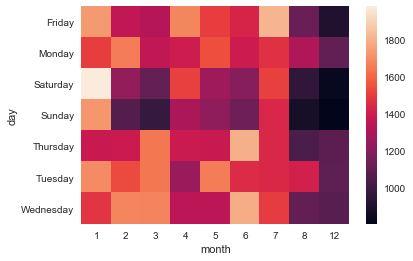

In [189]:
sns.heatmap(daymonth)
plt.show()

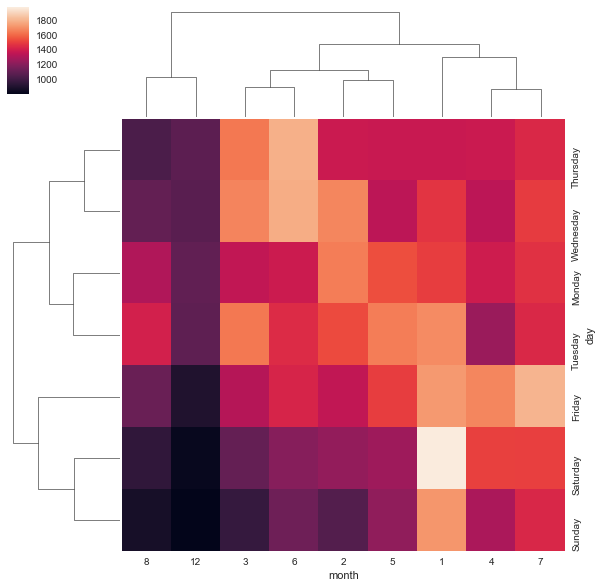

In [190]:
sns.clustermap(daymonth)